# Physiologica Data
Version Date: June 6, 2019

1. Physiological Data features as a function of time (order) 
2. Physiological Data features across LoA and conditions
3. Correlation of Physiological Data with SSQ scores
4. Difference of Auto-Manual across conditions


In [563]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [564]:
# Initialization
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
from os import listdir
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

_Which Participants will be analyzed based on Demographicsxls?_ *"Completed All"*

In [565]:
# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
Demographics = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "Master Data")
Demographics = Demographics.set_index('Participant ID')

In [566]:
# grouping participants based on their study completion status
status = Demographics.groupby('Participant Status')
completed_IDs = np.array(status.groups['All Completed'])[3:]

Analyzed_IDs = completed_IDs
Analyzed_IDs

array([19., 22., 23., 25., 26., 27., 28., 33., 34.])

In [567]:
## Setting the path to Quantitative Data
Quantitative_path = "N:\\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Quantitative"

# A. Reading the Data
## Features per participant

In [568]:
###Making a DataFrame for each of the features:

# def feature_from_physio_sig_csv(): ##fro future feautres

# Initializatino of Features
HR_sig_mean_df = pd.DataFrame(dtype = float)
HR_sig_SD_df   = pd.DataFrame(dtype = float)

TEMP_sig_mean_df = pd.DataFrame(dtype = float)
TEMP_sig_SD_df   = pd.DataFrame(dtype = float)

EDA_sig_mean_df = pd.DataFrame(dtype = float)
EDA_sig_SD_df   = pd.DataFrame(dtype = float)

## The signals 
HR_df = pd.DataFrame(dtype = float)
TEMP_df = pd.DataFrame(dtype = float)
EDA_df = pd.DataFrame(dtype = float)

for ID in Analyzed_IDs:
    ID = int(ID)
    for scenario in ["BM", "BA", "TM", "TA", "RM", "RA"]:
        scenario_path_Structured = Quantitative_path + "\\" + str(ID) + "\\Structured\\Empatica\\" + scenario 
        HR_csv = pd.read_csv(scenario_path_Structured + "\\" + scenario + "_HR.csv")
        TEMP_csv = pd.read_csv(scenario_path_Structured + "\\" + scenario + "_TEMP.csv")
        EDA_csv = pd.read_csv(scenario_path_Structured + "\\" + scenario + "_EDA.csv")
        
        
        ## Mean and SD features
        HR_sig_mean_df.loc[ID, scenario] = HR_csv.loc[:,["HR"]].mean()[0]
        HR_sig_SD_df.loc[ID, scenario]   =  HR_csv.loc[:,["HR"]].std()[0]
        
        TEMP_sig_mean_df.loc[ID, scenario] = TEMP_csv.loc[:,["TEMP"]].mean()[0]
        TEMP_sig_SD_df.loc[ID, scenario] = TEMP_csv.loc[:,["TEMP"]].std()[0]
        
        EDA_sig_mean_df.loc[ID, scenario] = EDA_csv.loc[:,["EDA"]].mean()[0]
        EDA_sig_SD_df.loc[ID, scenario] = EDA_csv.loc[:,["EDA"]].std()[0]

In [569]:
HR_sig_mean_df

,BM,BA,TM,TA,RM,RA
19,69.631542,70.679771,73.726771,76.832250,65.215229,62.511250
22,83.029081,63.361586,61.264739,56.766018,60.065117,58.612486
23,74.605010,75.334570,77.348432,77.343289,83.928910,75.550497
25,80.939740,78.575793,110.041140,90.054286,94.577619,83.987388
26,57.355333,57.180778,58.326800,56.682733,69.976800,63.704022
27,83.325742,72.598166,68.154105,62.346812,63.971205,61.414825
28,74.841059,66.753532,82.205632,78.110019,66.517193,67.527732
33,73.713470,87.262069,67.171293,71.522845,60.515603,65.084461
34,79.974063,78.330501,71.970056,69.152004,73.382078,65.576994


## Mean of features for all participants

In [570]:
features = ["Mean HR", "SD HR", "Mean TEMP","SD TEMP","Mean EDA", "SD EDA"]
scenarios = ["BM", "BA", "TM", "TA", "RM", "RA"]

mean_total_df = pd.DataFrame()

mean_total_df["Mean HR"] = HR_sig_mean_df.mean()
mean_total_df["SD HR"] = HR_sig_SD_df.mean()

mean_total_df["Mean TEMP"] = TEMP_sig_mean_df.mean()
mean_total_df["SD TEMP"] = TEMP_sig_SD_df.mean()

mean_total_df["Mean EDA"] = EDA_sig_mean_df.mean()
mean_total_df["SD EDA"] = EDA_sig_SD_df.mean()


## making the LoA column
for scenario in ["BM","TM","RM"]:
    mean_total_df.loc[scenario, "LoA"] = "Manual"
for scenario in ["BA","TA","RA"]:
    mean_total_df.loc[scenario, "LoA"] = "Auto"
        
## Making the driving condition column       
for scenario in ["TA","TM"]:
    mean_total_df.loc[scenario, "Driving Condition"] = "Traffic"
for scenario in ["RA","RM"]:
    mean_total_df.loc[scenario, "Driving Condition"] = "Rain"
for scenario in ["BM","BA"]:
    mean_total_df.loc[scenario, "Driving Condition"] = "Clear & No Traffic"


In [571]:
mean_total_df

,Mean HR,SD HR,Mean TEMP,SD TEMP,Mean EDA,SD EDA,LoA,Driving Condition
BM,75.268338,6.344110,31.994931,0.218834,0.732762,0.200121,Manual,Clear & No Traffic
BA,72.230752,7.763597,32.116482,0.186636,1.939524,0.381358,Auto,Clear & No Traffic
TM,74.467663,7.378300,31.453660,0.166655,1.781631,0.497339,Manual,Traffic
TA,70.978917,6.984195,31.342957,0.259139,1.611641,0.391024,Auto,Traffic
RM,70.905528,7.711653,31.542575,0.218023,1.513138,0.435175,Manual,Rain
RA,67.107740,5.372809,31.055688,0.212751,1.261106,0.614495,Auto,Rain


# B. Plotting the Data

## Features as a function of oder

In [572]:
Analyzed_groups = Demographics[['Manual/Auto Order', 'Participant Condition Order', 
                                 'Participant Completion Order','Participant Group Order']].loc[Analyzed_IDs]
Analyzed_groups.loc[:, "Participant Group Order"] = Analyzed_groups.loc[:, "Participant Group Order"].apply(lambda x : x[6:])

In [573]:
Analyzed_groups

,Manual/Auto Order,Participant Condition Order,Participant Completion Order,Participant Group Order
Participant ID,,,,
19.0,MA,BRT (1),"PM,PA, BM,BA,RM,RA,M,TA","BM,BA,RM,RA,TM,TA"
22.0,MA,BTR (2),"PM,PA,BM,BA,TM,TA,RM,RA","BM,BA,TM,TA,RM,RA"
23.0,MA,RTB (4),"PM,PA,RM,RA,TM,TA,BM,BA","RM,RA,TM,TA,BM,BA"
25.0,MA,TRB (5),"PM,PA,TM,TA,RM,RA,BM,BA","TM,TA,RM,RA,BM,BA"
26.0,MA,RBT (3),"PM,PA,RM,RA,BM,BA,TM,TA","RM,RA,BM,BA,TM,TA"
27.0,AM,BTR (2),"PM,PA,BA,BM,TA,TM,RA,RM","BA,BM,TA,TM,RA,RM"
28.0,MA,TBR (6),"PM,PA,TM,TA,BM,BA,RM,RA","TM,TA,BM,BA,RM,RA"
33.0,AM,BRT (1),"PM,PA,BA,BM,RA,RM,TA,TM","BA,BM,RA,RM,TA,TM"
34.0,AM,BTR (2),"PM,PA,BA,BM,TA,TM,RA,RM","BA,BM,TA,TM,RA,RM"


In [574]:
## defining a function to sort the features based on the order
def sort_to_trial_order(features, groups):
    features_ordered = pd.DataFrame(columns = ["Exp-1", "Exp-2", "Exp-3",
                                          "Exp-4", "Exp-5", "Exp-6"], dtype=float)
    
    features_group = pd.concat([features, groups],1)
    for ID,row in features_group.iterrows():
        features_ordered.loc[ID,:] = features_group.loc[ID,features_group.loc[ID, 'Participant Group Order'].split(",")].values
    
    return features_ordered

In [575]:
HR_sig_mean_sorted = sort_to_trial_order(HR_sig_mean_df, Analyzed_groups)
HR_sig_mean_sorted.loc[:,"feature"] = "HR Mean"

HR_sig_SD_sorted = sort_to_trial_order(HR_sig_SD_df, Analyzed_groups)
HR_sig_SD_sorted.loc[:,"feature"] = "HR SD"

TEMP_sig_mean_sorted = sort_to_trial_order(TEMP_sig_mean_df, Analyzed_groups)
TEMP_sig_mean_sorted.loc[:,"feature"] = "TEMP Mean"

TEMP_sig_SD_sorted = sort_to_trial_order(TEMP_sig_SD_df, Analyzed_groups)
TEMP_sig_SD_sorted.loc[:,"feature"] = "TEMP SD"

EDA_sig_mean_sorted = sort_to_trial_order(EDA_sig_mean_df, Analyzed_groups)
EDA_sig_mean_sorted.loc[:,"feature"] = "EDA Mean"

EDA_sig_SD_sorted = sort_to_trial_order(EDA_sig_SD_df, Analyzed_groups)
EDA_sig_SD_sorted.loc[:,"feature"] = "EDA SD"

In [576]:
all_features_ordered = pd.concat([HR_sig_mean_sorted, HR_sig_SD_sorted, TEMP_sig_mean_sorted,
                                 TEMP_sig_SD_sorted, EDA_sig_mean_sorted , EDA_sig_SD_sorted], 0)

all_features_ordered

,Exp-1,Exp-2,Exp-3,Exp-4,Exp-5,Exp-6,feature
19,69.631542,70.679771,65.215229,62.511250,73.726771,76.832250,HR Mean
22,83.029081,63.361586,61.264739,56.766018,60.065117,58.612486,HR Mean
23,83.928910,75.550497,77.348432,77.343289,74.605010,75.334570,HR Mean
25,110.041140,90.054286,94.577619,83.987388,80.939740,78.575793,HR Mean
26,69.976800,63.704022,57.355333,57.180778,58.326800,56.682733,HR Mean
27,72.598166,83.325742,62.346812,68.154105,61.414825,63.971205,HR Mean
28,82.205632,78.110019,74.841059,66.753532,66.517193,67.527732,HR Mean
33,87.262069,73.713470,65.084461,60.515603,71.522845,67.171293,HR Mean
34,78.330501,79.974063,69.152004,71.970056,65.576994,73.382078,HR Mean
19,2.927632,10.880198,5.040492,3.180622,10.919174,11.499614,HR SD


In [577]:
all_features_ordered.groupby(['feature']).get_group("EDA SD")

,Exp-1,Exp-2,Exp-3,Exp-4,Exp-5,Exp-6,feature
19,0.804698,2.269722,0.297316,0.020890,0.040398,0.015838,EDA SD
22,0.134146,0.015114,0.027716,0.013320,0.016340,0.013282,EDA SD
23,0.314413,0.388960,0.092512,0.082388,0.028548,0.039591,EDA SD
25,3.921908,2.784220,2.733551,2.211945,0.154872,0.171430,EDA SD
26,0.015620,0.006318,0.007047,0.005752,0.018639,0.003734,EDA SD
27,0.015482,0.012558,0.019138,0.005810,0.004967,0.008055,EDA SD
28,0.095839,0.105962,0.298625,0.670695,0.302745,2.806873,EDA SD
33,0.045656,0.040753,0.003479,0.004233,0.018380,0.005219,EDA SD
34,0.198777,0.319839,0.476231,0.268011,0.073745,0.224298,EDA SD


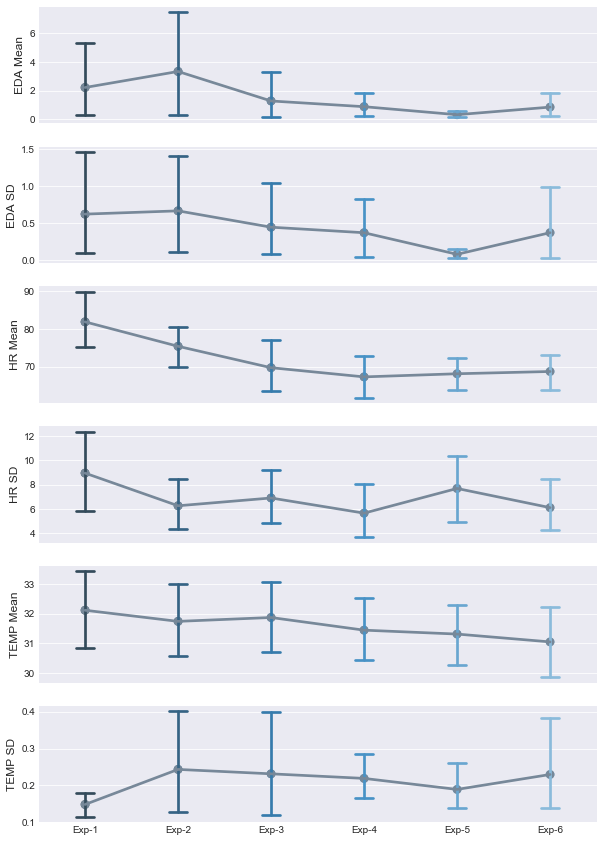

In [578]:
features = ["EDA Mean", "EDA SD", "HR Mean", "HR SD", "TEMP Mean", "TEMP SD"]

figure, axes = plt.subplots(len(features),1, figsize = (10,15), sharex= True)

i = 0
for f in features:    
    data = all_features_ordered.groupby(['feature']).get_group(f)
    sns.pointplot(data=data, capsize=.2, palette="Blues_d", ax = axes[i], join = True, linestyles=["-"])
    sns.pointplot(data=data,ax = axes[i], join = True, linestyles=["-"], ci = None, color = "lightslategray")
    axes[i].set_ylabel(f)
    i= i+1


## SSQ correlation with physio features

### SSQ Reading

In [594]:
# reading the SSQ data into a dataframe--- index = participant ID, colums = feature label
SSQ = pd.read_excel(Qualitative_Path + "SSQ.xlsx", sheet_name = "Master_SSQ")
SSQ.columns = SSQ.loc[0,:]
SSQ.drop(index = 0)
SSQ = SSQ.set_index('Participant ID')
SSQ.drop(index = 'Participant ID', inplace=True)

def get_SSQ_subscores_for_given_participants(SSQ, IDs):
    SSQ = SSQ.loc[IDs].drop(columns = ['Status'])
    SSQ.astype(float)  
    SSQ_N = SSQ.iloc[:,0:8].astype(float).drop(columns = ["PA","PM"])
    SSQ_OD = SSQ.iloc[:,8:16].astype(float).drop(columns = ["PA","PM"])
    SSQ_D = SSQ.iloc[:,16:24].astype(float).drop(columns = ["PA","PM"])
    SSQ_T = SSQ.iloc[:,24:32].astype(float).drop(columns = ["PA","PM"])

    return SSQ_N,SSQ_OD,SSQ_D,SSQ_T

SSQ_N,SSQ_OD,SSQ_D,SSQ_T = get_SSQ_subscores_for_given_participants(SSQ, Analyzed_IDs)

SSQ_N.rename(columns = {"BM": "Nausea in BM", "BA": "Nausea in BA","RM": "Nausea in RM",
                       "RA": "Nausea in RA","TM": "Nausea in TM","TA": "Nausea in TA"}, inplace = True) 

SSQ_OD.rename(columns = {"BM": "Ocul. Dist. in BM", "BA": "Ocul. Dist. in BA","RM": "Ocul. Dist. in RM",
                       "RA": "Ocul. Dist. in RA","TM": "Ocul. Dist. in TM","TA": "Ocul. Dist. in TA",}, inplace = True) 

SSQ_D.rename(columns = {"BM": "Disorientation in BM", "BA": "Disorientation in BA","RM": "Disorientation in RM",
                       "RA": "Disorientation in RA","TM": "Disorientation in TM","TA": "Disorientation in TA",}, inplace = True)

SSQ_T.rename(columns = {"BM": "Total SS in BM", "BA": "Total SS in BA","RM": "Total SS in RM",
                       "RA": "Total SS in RA","TM": "Total SS in TM","TA": "Total SS in TA",}, inplace = True)


SSQ_participants_scenarios = pd.concat([SSQ_N, SSQ_OD, SSQ_D, SSQ_T], 1)


In [595]:
HR_sig_mean_df.rename(columns = {"BM": "HR Mean in BM", "BA": "HR Mean in BA","RM": "HR Mean in RM",
                       "RA": "HR Mean in RA","TM": "HR Mean in TM","TA": "HR Mean in TA"}, inplace = True) 

HR_sig_SD_df.rename(columns = {"BM": "HR SD in BM", "BA": "HR SD in BA","RM": "HR SD in RM",
                       "RA": "HR SD in RA","TM": "HR SD in TM","TA": "HR SD in TA"}, inplace = True) 

EDA_sig_mean_df.rename(columns = {"BM": "EDA Mean in BM", "BA": "EDA Mean in BA","RM": "EDA Mean in RM",
                       "RA": "EDA Mean in RA","TM": "EDA Mean in TM","TA": "EDA Mean in TA"}, inplace = True) 

EDA_sig_SD_df.rename(columns = {"BM": "EDA SD in BM", "BA": "EDA SD in BA","RM": "EDA SD in RM",
                       "RA": "EDA SD in RA","TM": "EDA SD in TM","TA": "EDA SD in TA"}, inplace = True) 

TEMP_sig_mean_df.rename(columns = {"BM": "TEMP Mean in BM", "BA": "TEMP Mean in BA","RM": "TEMP Mean in RM",
                       "RA": "TEMP Mean in RA","TM": "TEMP Mean in TM","TA": "TEMP Mean in TA"}, inplace = True) 

TEMP_sig_SD_df.rename(columns = {"BM": "TEMP SD in BM", "BA": "TEMP SD in BA","RM": "TEMP SD in RM",
                       "RA": "TEMP SD in RA","TM": "TEMP SD in TM","TA": "TEMP SD in TA"}, inplace = True) 

physio_participants_scenarios = pd.concat([HR_sig_mean_df, HR_sig_SD_df, EDA_sig_mean_df, 
                                         EDA_sig_SD_df, TEMP_sig_mean_df, TEMP_sig_SD_df ],1)

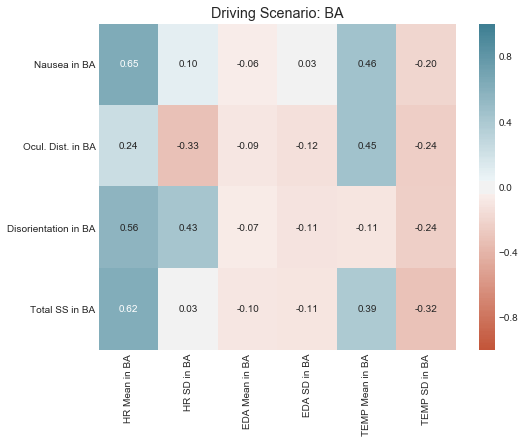

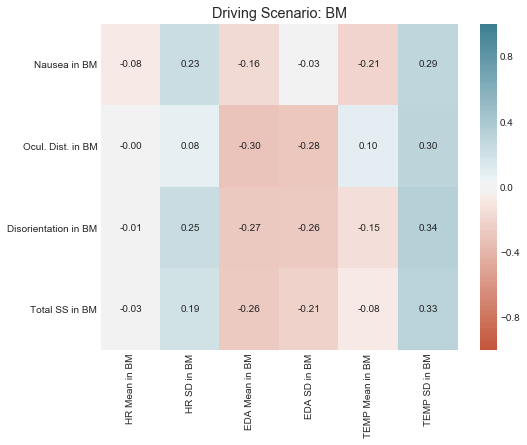

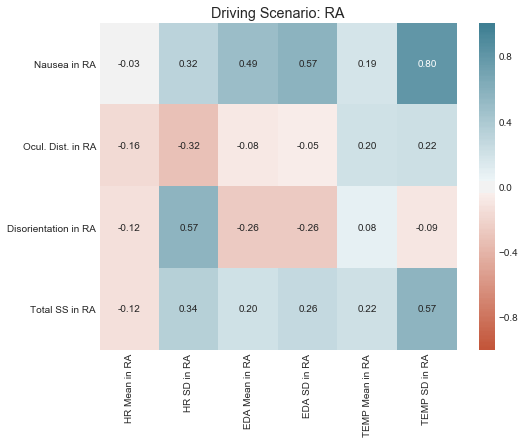

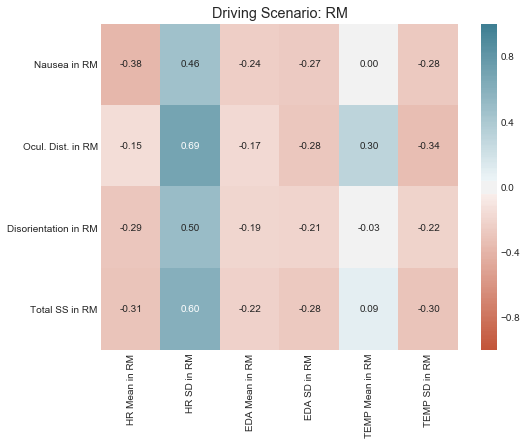

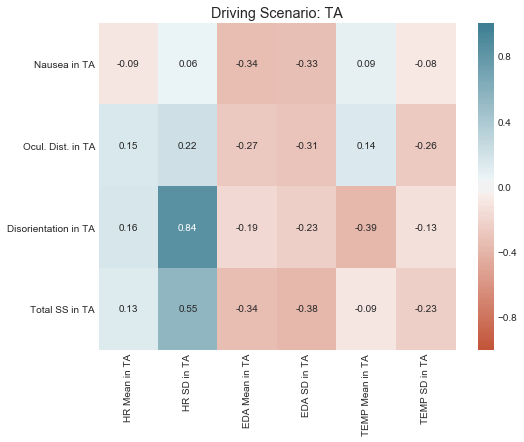

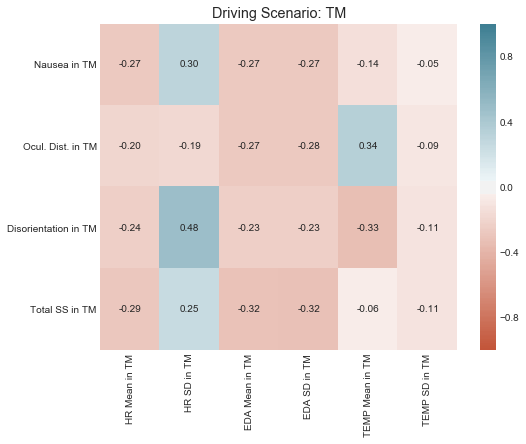

In [597]:
data = pd.concat([SSQ_participants_scenarios, physio_participants_scenarios], 1)

for scenario in ["BA", "BM", "RA", "RM", "TA", "TM"]:
    SSQ_Physio_corr = data.corr().loc[["Nausea in "+scenario , "Ocul. Dist. in "+scenario, 
                                       "Disorientation in "+scenario, "Total SS in "+scenario],
                                      ["HR Mean in "+scenario, "HR SD in "+scenario, "EDA Mean in "+scenario, 
                                       "EDA SD in "+scenario, "TEMP Mean in "+scenario, "TEMP SD in "+scenario]]

    fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
    sns.heatmap(SSQ_Physio_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)
    plt.title("Driving Scenario: "+scenario)

Text(0.5, 1.0, 'Coorelation of SSQ Disorientation Score and HR SD')

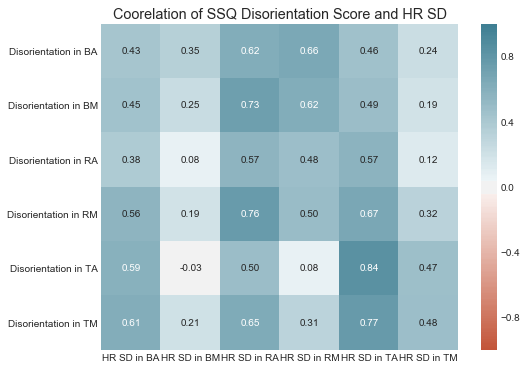

In [599]:
SSQ_Physio_corr = data.corr().loc[[ "Disorientation in BA", "Disorientation in BM",
                                  "Disorientation in RA", "Disorientation in RM",
                                  "Disorientation in TA", "Disorientation in TM"],
                                      [ "HR SD in BA", "HR SD in BM",
                                  "HR SD in RA", "HR SD in RM",
                                  "HR SD in TA", "HR SD in TM"],]

fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(SSQ_Physio_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)
plt.title("Coorelation of SSQ Disorientation Score and HR SD")

## Plotting Features across each of the 6 experimental scenarios

In [507]:
def grouped_barplot(df, cat,subcat, val , err):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    color = ["darksalmon", "maroon"]
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{} {}".format(subcat, gr), yerr=dfg[err].values, color = color[i])
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.legend()
    plt.show()

## Mean HR

In [508]:
import matplotlib.style as style
style.use('ggplot')

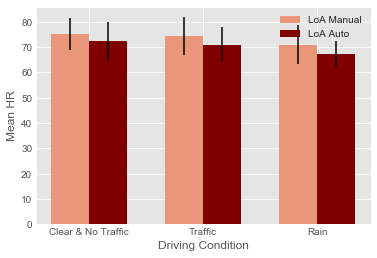

In [509]:
data = mean_total_df.reset_index(inplace= False).rename(columns={"index" : "scenario"})

#my_pal = {"BM":"palegoldenrod" ,'BA':'y', 'RM':'cadetblue',  "RA":'teal', "TM": "peachpuff",'TA': 'darksalmon'}


my_pal = {"Manual": "y", "Auto": "darkolivegreen"}

#g = sns.catplot(x = "Driving Condition", y='Mean HR', hue = "LoA", data=data, palette= my_pal,kind = "bar", aspect = 1.1)

grouped_barplot(data, cat= "Driving Condition", subcat = "LoA", val = "Mean HR", err = "SD HR")

## Mean EDA

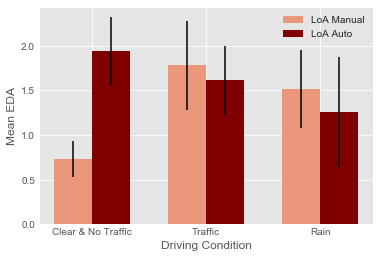

In [510]:
#g = sns.catplot(x = "Driving Condition", y='Mean HR', hue = "LoA", data=data, palette= my_pal,kind = "bar", aspect = 1.1)

grouped_barplot(data, cat= "Driving Condition", subcat = "LoA", val = "Mean EDA", err = "SD EDA" )

## Mean Temp

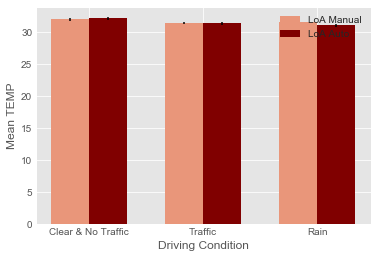

In [511]:
grouped_barplot(data, cat= "Driving Condition", subcat = "LoA", val = "Mean TEMP", err = "SD TEMP" )

## Mean Auto - Mean

## Correlation with Acceptance Questionnaires